# Summary

This is an exploratory data analysis of the election results in Linz of the 2021 state election in Upper Austria. The EDA comprises preprocessing, evaluation of various statistical metrics done with pandas, various plots such as regression plots and correlation matrices using the python library seaborn. At the end of each mentioned task, some interesting insights are presented to the reader. 

# Background Information

LT21Sprengel.csv (Source: https://data.linz.gv.at/katalog/population/wahlen/landtagswahl/2021/) contains the results of the 2021 state election in Upper Austria (Oberösterreich) constrained to the votes of Upper Austria's capital city Linz. For the purpose of the election the capital is divided into 'Wahlsprengel'. On average about 500 people elligible to vote live in each Wahlsprengel. 

In [156]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [157]:
#read in data and rename column names for comfort

file_path = "C:/Users/phili/OneDrive/Dokumente/LT21Sprengel.csv"
raw_data= pd.read_csv(file_path, delimiter=';', encoding='unicode_escape')
raw_data.rename(columns={'Wahlberechtigte': 'Wahlber.',
                         'gültige Stimmen': 'gült. Stimmen',
                         'abgegebene Stimmen': 'abg. Stimmen'},
                inplace=True) #abbreviate column names for comfort

# First Look at data

Starting off the exploratory data analysis, I took a look at the data structure 
(e.g. names of columns, which columns are qualitative/quantitative, etc.).
I also looked into some statistical metrics such as the mean, std, etc. of each 
column to get a better unterstanding of the distribution of the numerical data.

In [158]:

print(raw_data.head())
print(raw_data.describe())
print(raw_data.info()) #data is clean
print('All columns: ', raw_data.columns)
print(raw_data.dtypes.value_counts())
print('Shape: ', raw_data.shape)

   Wahl  Wahlsprengel  Wahlber.  abg. Stimmen  gült. Stimmen  ÖVP  FPÖ  SPÖ  \
0  LT21             1       500           312            306   72   31   53   
1  LT21             3       492           339            337   73   25   55   
2  LT21             4       563           370            363  112   28   52   
3  LT21             5       512           395            392  126   26   43   
4  LT21            20       547           378            374   73   26   78   

   GRÜNE  NEOS  MFG  KPÖ  BESTE  UBB  R  
0     75    35   20   19      1    0  0  
1    124    34   11    8      5    1  1  
2    109    31   28    3      0    0  0  
3    141    31   10   12      2    0  1  
4    126    33   15   18      5    0  0  
       Wahlsprengel    Wahlber.  abg. Stimmen  gült. Stimmen         ÖVP  \
count    237.000000  237.000000    237.000000     237.000000  237.000000   
mean     376.962025  566.130802    360.573840     351.194093   94.253165   
std      222.498645  115.450975    160.500937

I got rid of some columns and added the Party colors

In [159]:
"""Delete unnecessary columns"""
raw_data.drop('Wahl', axis=1, inplace=True) #Landtagswahl_21

total_valid_votes= raw_data['gült. Stimmen'].sum()
excluded_parties= [col for col in raw_data.columns if  raw_data[col].sum() / total_valid_votes < 0.05]
consolidated_data= raw_data.drop(excluded_parties, axis=1) #drop parties which received less than 5% of the votes
print('Selected columns: ', consolidated_data.columns)

Selected columns:  Index(['Wahlsprengel', 'Wahlber.', 'abg. Stimmen', 'gült. Stimmen', 'ÖVP',
       'FPÖ', 'SPÖ', 'GRÜNE', 'NEOS'],
      dtype='object')


In [160]:
"""Parties and their associated colors"""
Parties=['ÖVP', 'FPÖ', 'SPÖ', 'GRÜNE', 'NEOS']
party_colors=['turquoise','mediumblue','red', 'lawngreen', 'deeppink']
Party_color_dict=dict(zip(Parties, party_colors)) #useful if order of partys in a plot changes

# Data Analysis/Plots

## Election results

After some preprocessing of the data such as getting rid of parties with less than 5% of the total vote,
I plotted the election results.

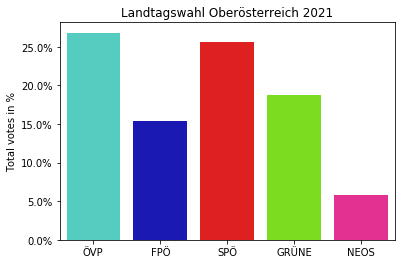

Election Results:  {'ÖVP': 0.2683791284706787, 'FPÖ': 0.15356889695193013, 'SPÖ': 0.25613638821140655, 'GRÜNE': 0.18823062967813248, 'NEOS': 0.05813799814977232}


In [161]:

Election_results_per_party= dict(zip(Parties, [consolidated_data[party].sum()/total_valid_votes for party in Parties]))

sns.barplot(x=list(Election_results_per_party.keys()), y=list(Election_results_per_party.values()),
            palette=party_colors)
plt.ylabel('Total votes in %')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
plt.title('Landtagswahl Oberösterreich 2021')
plt.show()
print('Election Results: ', Election_results_per_party)

## Regression

To find out if there are any significant correlations between votes and population size of a 
'Wahlsprengel' for any party, I created regression plots for each party.


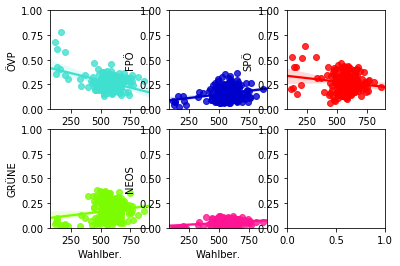

In [162]:
votes_in_rel_to_pop_size= consolidated_data.copy()
for party in Parties:
    votes_in_rel_to_pop_size[party]= votes_in_rel_to_pop_size[party]/votes_in_rel_to_pop_size['gült. Stimmen']


fig, axes = plt.subplots(2, 3)
for i in range(len(Parties)):
    if i<=2:
        sns.regplot(x=votes_in_rel_to_pop_size['Wahlber.'], y=votes_in_rel_to_pop_size[Parties[i]], ax= axes[0,i],
                    color=party_colors[i])
        axes[0,i].set(ylim=(0,1))
    else:
        sns.regplot(x=votes_in_rel_to_pop_size['Wahlber.'], y=votes_in_rel_to_pop_size[Parties[i]], ax=axes[1,i-3],
                    color=party_colors[i])
        axes[1,i-3].set(ylim=(0,1))

plt.show()

### Insights

The Austrian people's party (ÖVP) shows a relatively large negative correlation in Linz. 
This is not very surprising since this party usually also performs better in rural areas.
The Austrian social democratic party (SPÖ) seems to correlate with population size negatively as well. 
But this observation could be misleading considering the high leverage points of 'Wahlsprengel' 
with low population size where the social democrats performed very well.


## Correlation Matrix 

Additionally, I drew the correlation matrix of all five partys.

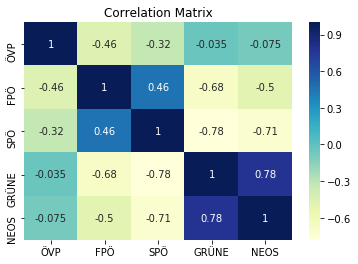

In [163]:

corr_matrix= votes_in_rel_to_pop_size[[
                                'ÖVP', 'FPÖ', 'SPÖ', 'GRÜNE', 'NEOS']].corr(method='pearson')
ax = sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True)

#fix format
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.title('Correlation Matrix')
#plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

### Insights

GRÜNE and NEOS show high positive correlations. Both are high negative correlated to SPÖ and FPÖ. ÖVP also seems to be negatively correlated to both SPÖ and FPÖ but shows almost no correlations to GRÜNE and NEOS. 

## Election results per Wahlsprengel 

To gain potential further insight, I plotted the number of 'Wahlsprengel' won per party.


Wahlsprengel won per party:  {'SPÖ': 99, 'ÖVP': 95, 'GRÜNE': 35, 'FPÖ': 8, 'NEOS': 0}


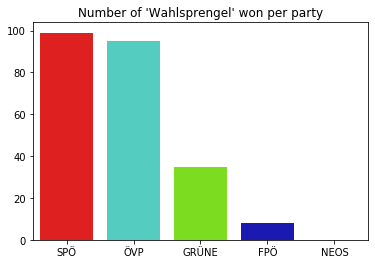

In [164]:
"""How many 'Wahlsprengel could each party win?"""
no_of_Wahlsp_won = consolidated_data.copy()
no_of_Wahlsp_won['Winner']= no_of_Wahlsp_won[Parties].idxmax(axis=1) #get party with most votes per Wahlsprengel

wins_per_party = dict(no_of_Wahlsp_won['Winner'].value_counts())
for party in Parties:
    if not party in wins_per_party.keys():
        wins_per_party[party]= 0
print('Wahlsprengel won per party: ', wins_per_party)

sns.barplot(x=list(wins_per_party.keys()), y=list(wins_per_party.values()),
            palette=Party_color_dict)
plt.title("Number of 'Wahlsprengel' won per party")
plt.show()

### Insights

Even though ÖVP won the election in Linz, SPÖ won more Wahlsprengel in total. This can at least in part be explained by the high negative correlation of ÖVP's votes and population size per Wahlsprengel. 

# Possible follow-ups:

Why is there such a high correlation between NEOS and GRÜNE? 
Why show NEOS and ÖVP almost no correlation? 
Are Wahlsprengel with higher populations also more densely populated?